In [7]:
pwd

'/home/ubuntu-user/popjym-main'

In [2]:
import pickle
with open("./popjym/dqn_flax/train_state.pkl", "rb") as f:
    trainstate = pickle.load(f)
print(trainstate)

{'q_network': {'params': {'Dense_0': {'bias': Array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.

In [12]:
import pickle
import popjym
import jax
import jax.numpy as jnp
from matplotlib import pyplot as plt
from jax import lax

from popjym.dqn_flax.dqn import QNetwork
from popjym.dqn_flax.wrappers import LogWrapper
with open("./popjym/dqn_flax/train_state.pkl", "rb") as f:
    trainstate = pickle.load(f)
# print(trainstate)

seed = jax.random.PRNGKey(0)
env, env_params = popjym.make("FullyObservableCountRecallEasy")
obs, state = env.reset(seed, env_params)

countrecallrender = popjym.make_render("CountRecallRender")

board = countrecallrender.render(state)
plt.axis('off')
plt.imshow(board)
plt.show()

# # while True:
# for i in range(5):
#     key, subkey = jax.random.split(seed)
#     # action = env.action_space(env_params).sample(subkey)
#     action = 4
#     # action = int(input("Input action (1, 2, 3, 4, 5): "))
#     key, subkey2 = jax.random.split(key)


#     obs, state, reward, done, info = env.step(subkey, state, action)

#     board = countrecallrender.render(state)
#     plt.axis('off')
#     plt.imshow(board)
#     plt.show()

#     print('----------')
#     if done:
#         break


network = QNetwork(action_dim=env.action_space(env_params).n)
network_params = trainstate["q_network"]
network_params = trainstate["target_q_network"]
q_vals = network.apply(network_params, board)
print(q_vals)


ModuleNotFoundError: No module named 'wrappers'

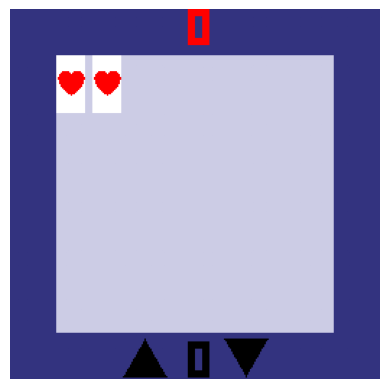

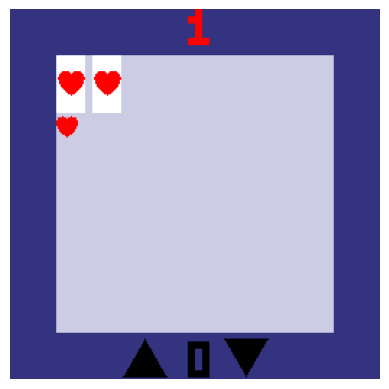

----------


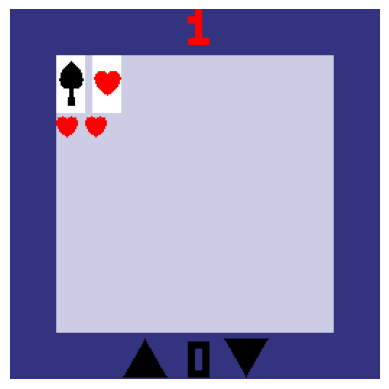

----------


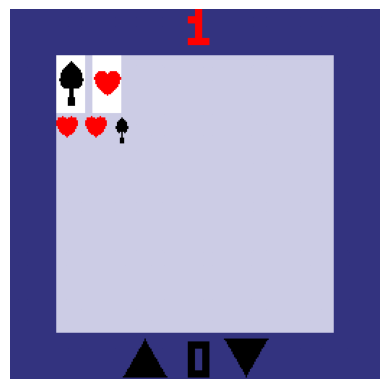

----------


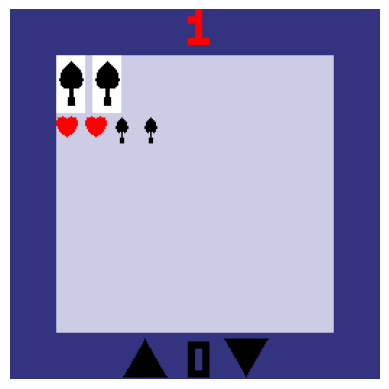

----------


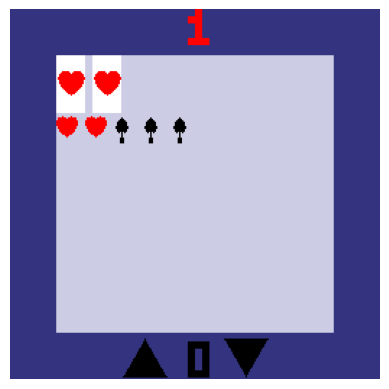

----------


In [ ]:
import popjym
import jax
import jax.numpy as jnp
from matplotlib import pyplot as plt
from jax import lax


seed = jax.random.PRNGKey(0)
env, env_params = popjym.make("FullyObservableCountRecallEasy")
obs, state = env.reset(seed, env_params)
# with jax.log_compiles(True):
countrecallrender = popjym.make_render("CountRecallRender")

# board = countrecallrender.render(obs, state.timestep, env.num_types, score)
board = countrecallrender.render(state)
plt.axis('off')
plt.imshow(board)
plt.show()
# print(f'history from render: {history}')

# while True:
for i in range(5):
    key, subkey = jax.random.split(seed)
    # action = env.action_space(env_params).sample(subkey)
    action = 4
    # action = int(input("Input action (1, 2, 3, 4, 5): "))
    key, subkey2 = jax.random.split(key)


    obs, state, reward, done, info = env.step(subkey, state, action)

    board = countrecallrender.render(state)
    plt.axis('off')
    plt.imshow(board)
    plt.show()

    print('----------')
    if done:
        break
